<a href="https://colab.research.google.com/github/marparven1/MachineLearning_Classification/blob/main/Fraud_Detection_NN_Loyola_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Detección de fruade
Este ejercicio tiene por objetivo poner en práctica los conceptos las técnicas de aprendizaje supervisado y en particular clasificación. El ejercicio se divide en las siguientes secciones: 
1. exploración de los datos mediante técnicas estadísticas clásicas, 
2. selección de atributos, 
3. entrenamiento de diferentes clasificadores,
4. evaluación.

# Librerías:
Importamos todas las librerías que serán utilizadas para el ejercicio.




In [20]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip3 install seaborn
import seaborn as sns
!pip install --upgrade --no-cache-dir gdown
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Datos:
Descargamos los datos desde google drive a la instancia de google colab.

In [2]:
!gdown --id 1bWFuwCD_elqw3_jzR1Xob1YMnu-c7HcF

/opt/anaconda3/lib/python3.8/site-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bWFuwCD_elqw3_jzR1Xob1YMnu-c7HcF
To: /Users/martavenegas/Desktop/LOYOLA/PrimerCuatri/Aprendizaje_Automatico/Clasificacion/MachineLearning_Classification/creditcard.csv
100%|████████████████████████████████████████| 150M/150M [00:05<00:00, 28.0MB/s]


In [3]:
# Ref.: https://www.kaggle.com/isaikumar/creditcardfraud/version/1
# Data frame with credit card data

# Leemos el archivo CSV
df = pd.read_csv( 'creditcard.csv' )

# 1. Análisis de los datos

1.   Visualizamos la información del dataframe de datos.
2.   Calculamos la correlación entre cada una de las variables y la clase. Cuanto más grande el valor de correlación en valor absoluto mayor es la correlación estadística entre la variable y la clase Class que contiene si la transacción es fraudulenta o legítima.


In [4]:
# 1
# Details on data
print(df.shape)
print(df.columns)

# 2
# Compute correlation of features with respect to Class
# By default uses Pearson correlation that estimates linear correlation: 
# +1 or -1 linearly correlated, 0 non linear correlated
df.corr()["Class"].sort_values(key=abs,ascending=False)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Class     1.000000
V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V11       0.154876
V4        0.133447
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V2        0.091289
V6       -0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time     -0.012323
V28       0.009536
V24      -0.007221
Amount    0.005632
V13      -0.004570
V26       0.004455
V15      -0.004223
V25       0.003308
V23      -0.002685
V22       0.000805
Name: Class, dtype: float64

<AxesSubplot:>

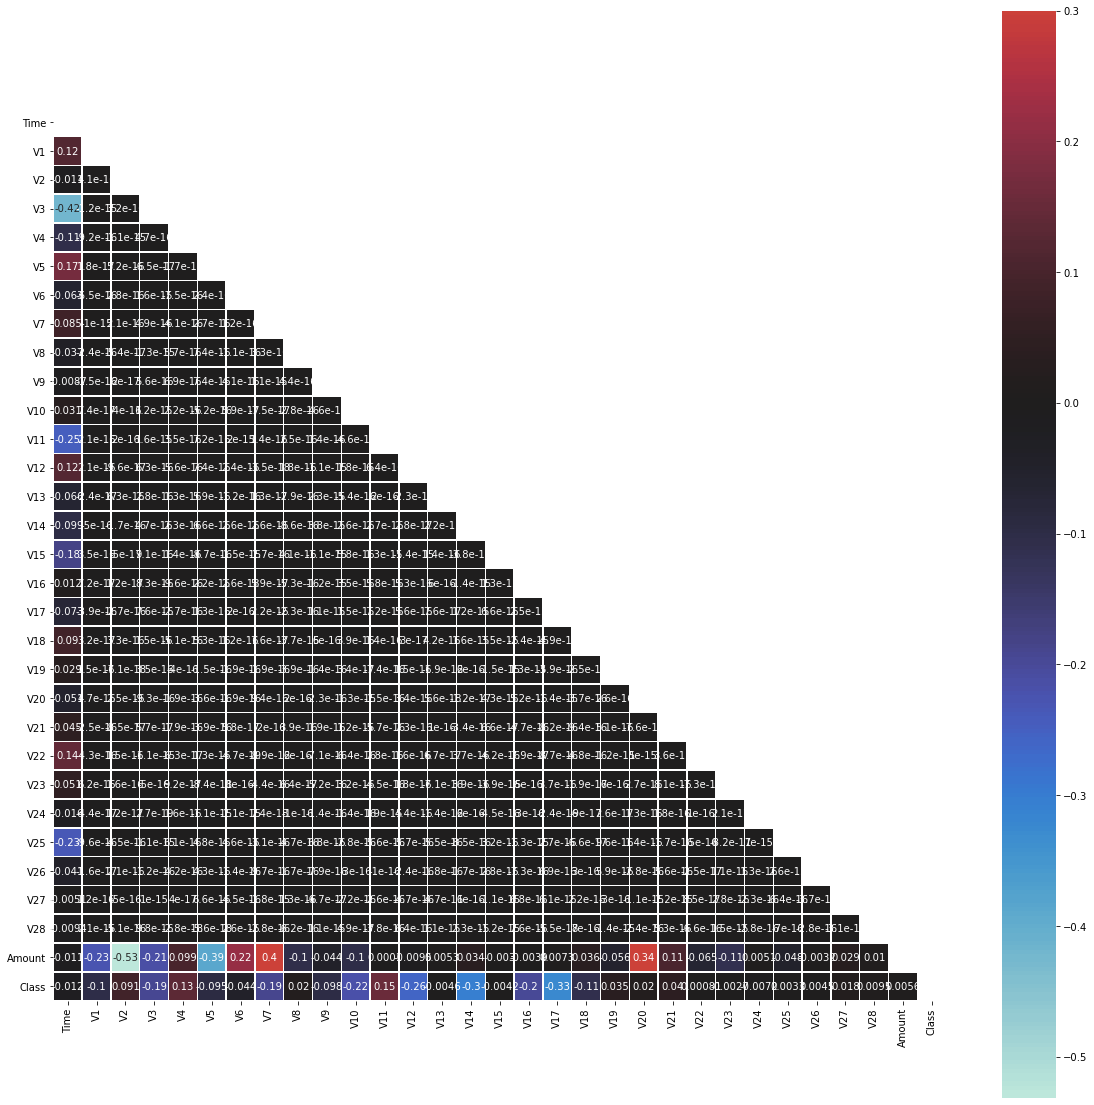

In [5]:
import seaborn as sns
import numpy as np
corr_mat = df.corr()
plt.figure(figsize=(20,20))
matrix = np.triu(corr_mat)
sns.heatmap(corr_mat, annot=True, linewidth=.5,vmax=.3, center=0,   square=True, mask = matrix)

In [6]:
# Porcentaaje de casos de No fraude y fraude
df.Class.value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [22]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 0.98, 'Número de fraudes')

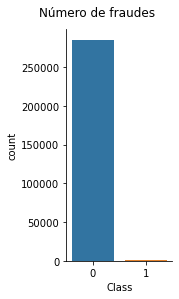

In [7]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
fg = sns.catplot(x='Class', data=df, kind='count', height=4, aspect=.6)
fg.set_xlabels('Class')
# Add title and axis names

fg.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
fg.fig.suptitle('Número de fraudes')

In [8]:
# Valores faltantes
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5, 1.0, 'Importe')

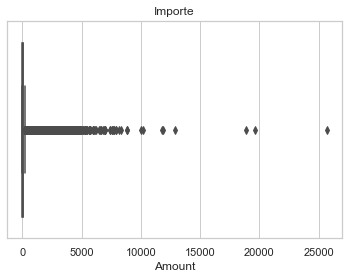

In [10]:
# boxplot para detectar outliers
Fraude = df.Amount
sns.set_theme(style="whitegrid")
p=sns.boxplot(x=Fraude)
p.set_title("Importe")


# 2. Selección de atributos
1. Seleccionamos los atributos (características) a ser utilizadas. Dentro de los atributos $X$ no debe estar la clase $Class$.
2. Verificamos la cantidad de muestras de cada clase.

In [122]:
# 1
# Extract features and labels

#
# Obs. Modify the following code to select set of features
#
# The following line allows to select some variables to be used
X = df.loc[:,['V17','V12','V10','V14','Amount']]
#X = df.loc[:,['V17','Amount']]
#X = df.loc[:,['V17','V12','V16','V3','V7','V10','V14','Amount']]
# Class is the target to predict (classify)
y = df.Class

# 2
# Number of samples per class
unique, counts = np.unique(y, return_counts=True)
for i in range(0,len(unique)):
  print('Class %i: Samples %i' % (unique[i], counts[i]) )

# Number of attributes
print('Number of attributes: %i' % (X.shape)[1])

Class 0: Samples 284315
Class 1: Samples 492
Number of attributes: 5


# 3. Entrenamiento del clasificador

1. El conjunto de datos se separa en entrenamiento y test.
2. Se selecciona y entrena un clasificador.
3. Métricas de performance



In [123]:
# Classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1
# Split train and test 
# stratify=y means the same % of classes is present in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

# 2
#
# Selection of classifier
#
#clf = KNeighborsClassifier(n_neighbors=5)
#clf = KNeighborsClassifier(n_neighbors=10)
#clf = DecisionTreeClassifier( random_state=1234,max_depth =4 , max_leaf_nodes=10)
#clf = LogisticRegression(solver='lbfgs',max_iter=500)
clf = GaussianNB()

# Train classifier
clf.fit(X_train,y_train)

# Opcional: Sirve para visualizar las probabilidades a 
# Priors GuassianNB
#print( clf.class_prior_ )

# Opcional: Visualización de los coeficientes de regresión logística.
# Coefs Logistic Regression
# print( clf.coef_ )

GaussianNB()

# 4. Evaluación

In [124]:
# 3
# Confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['1', '0']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (Fraud) %s: ' % report['0'])
print('Class 1 (Valid) %s: ' % report['1'])

# Amount of fraud detected
a = X_test.Amount
# TP 
ind = (y_pred == 1) & (y_test == 1)
# Amount for TP
amount_detected = np.sum( a[ ind ] ) 
# Total amount of fraud
ind = (y_test == 1)
amount_total = np.sum( a[ ind ] ) 

print('\n Amount ------------------ \n Detected = %f, Total = %f, Percentage = %f' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

 Confusion matrix ------------------
[[140724   1434]
 [    42    204]]

 % Corr ----------------------------
98.96351226089155

 Classification report ------------------
Class 0 (Fraud) {'precision': 0.12454212454212454, 'recall': 0.8292682926829268, 'f1-score': 0.2165605095541401, 'support': 246}: 
Class 1 (Valid) {'precision': 0.9997016324964835, 'recall': 0.9899126324230786, 'f1-score': 0.9947830512787886, 'support': 142158}: 

 Amount ------------------ 
 Detected = 21864.330000, Total = 30229.360000, Percentage = 72.328127


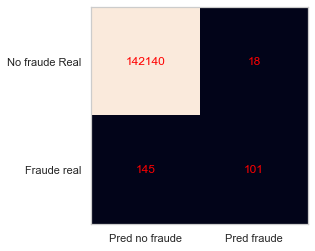

In [23]:
cm1 = cm
fig, ax = plt.subplots()
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred no fraude', 'Pred fraude'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No fraude Real', 'Fraude real'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

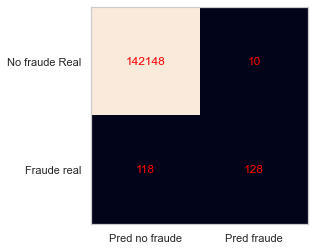

In [57]:
cm2 = cm
fig, ax = plt.subplots()
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred no fraude', 'Pred fraude'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No fraude Real', 'Fraude real'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

D Tree classifier 1


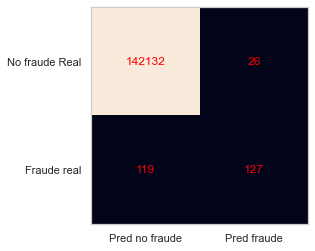

In [62]:
cm3 = cm
print('D Tree classifier 1')
fig, ax = plt.subplots()
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred no fraude', 'Pred fraude'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No fraude Real', 'Fraude real'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Mas error al predecir el no fraude.

D Tree classifier 2


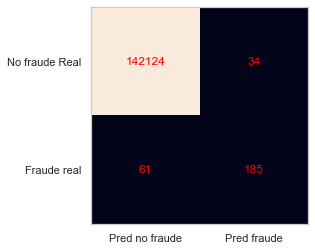

In [51]:
cm4 = cm
print('D Tree classifier 2')
fig, ax = plt.subplots()
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred no fraude', 'Pred fraude'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No fraude Real', 'Fraude real'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


Regresión logística 1



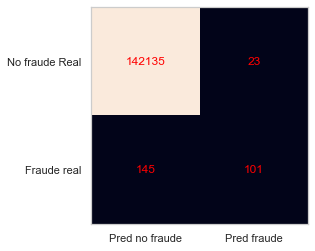

In [76]:
cm5 = cm
print('\nRegresión logística 1\n')
fig, ax = plt.subplots()
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred no fraude', 'Pred fraude'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No fraude Real', 'Fraude real'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


Regresión logística 2



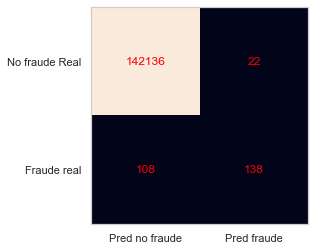

In [72]:
cm6 = cm
print('\nRegresión logística 2\n')
fig, ax = plt.subplots()
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred no fraude', 'Pred fraude'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No fraude Real', 'Fraude real'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


 Naive Bayes 1



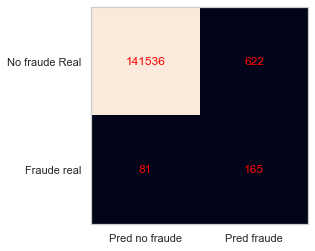

In [97]:
cm7 = cm
print('\n Naive Bayes 1\n')
fig, ax = plt.subplots()
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred no fraude', 'Pred fraude'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No fraude Real', 'Fraude real'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


 Naive Balles 2



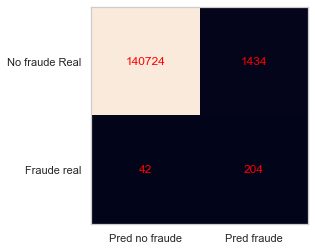

In [87]:
cm8 = cm
print('\n Naive Bayes 2\n')
fig, ax = plt.subplots()
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred no fraude', 'Pred fraude'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No fraude Real', 'Fraude real'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


 Naive Bayes 2



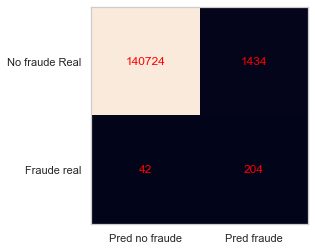

In [101]:
cm9 = cm
print('\n Naive Bayes 2\n')
fig, ax = plt.subplots()
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Pred no fraude', 'Pred fraude'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No fraude Real', 'Fraude real'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

En nuestras matrices de confusión:

- TP: No defraudadores predichos bien
- TN: Defraudadores predichos como defraudadores
- FP: Defraudadores predichos como NO defraudadores (peligroso)
- FN: No son defraudadores pero son predichos como defraudadores
- Precision: De todos los que no han defraudado (positive), cuáles son los que realmente no han defraudaado
- Recall: De todos los que no han defraudado, qué porcentaje fué predicho bien 

In [121]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.85      0.41      0.55       246

    accuracy                           1.00    142404
   macro avg       0.92      0.71      0.78    142404
weighted avg       1.00      1.00      1.00    142404



In [167]:
X = df.loc[:,['V17','V12','V10','V14','Amount']]
#X = df.loc[:,['V17','Amount']]
y = df.Class
# Classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1
# Split train and test 
# stratify=y means the same % of classes is present in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

# 2
#
# Selection of classifier
#
#clf = KNeighborsClassifier(n_neighbors=5)
#clf = KNeighborsClassifier(n_neighbors=10)
clf = DecisionTreeClassifier( random_state=1234,
                             max_depth =4 , # Max profundidad
                             max_leaf_nodes=10 # Max nº nodos terminales
                            )
#clf = LogisticRegression(solver='lbfgs',max_iter=500)
#clf = GaussianNB()

# Train classifier
clf.fit(X_train,y_train)
# 3
# Confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['1', '0']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (Fraud) %s: ' % report['0'])
print('Class 1 (Valid) %s: ' % report['1'])

# Amount of fraud detected
a = X_test.Amount
# TP 
ind = (y_pred == 1) & (y_test == 1)
# Amount for TP
amount_detected = np.sum( a[ ind ] ) 
# Total amount of fraud
ind = (y_test == 1)
amount_total = np.sum( a[ ind ] ) 

print('\n Amount ------------------ \n Detected = %f, Total = %f, Percentage = %f' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

 Confusion matrix ------------------
[[142124     34]
 [    61    185]]

 % Corr ----------------------------
99.93328839077554

 Classification report ------------------
Class 0 (Fraud) {'precision': 0.8447488584474886, 'recall': 0.7520325203252033, 'f1-score': 0.7956989247311829, 'support': 246}: 
Class 1 (Valid) {'precision': 0.999570981467806, 'recall': 0.9997608294995709, 'f1-score': 0.9996658964701083, 'support': 142158}: 

 Amount ------------------ 
 Detected = 19504.530000, Total = 30229.360000, Percentage = 64.521809


Variables predictoras: 


| Features | Target | Model | Hyperparam. | Acc. | F1 Score| Precision | Recall | % Fr detectado(recal para fraude) | FP | FN | % monto Fraude|
---------- | ------ | ----- | ----------- | ---- | ------- | --------- | ------ | --------------------------------- | -- | -- | ------ | 
| V17, Amount | Class | KNN  | Nº vecinos=5     | 99.88% | 99.94%/55% | 99.898%/84.87% | 99.98/41%|  41 % | 18 | *145* | 11.67 |
| V17,V14, V12, V10,Amount| Class | KNN  | Nº vecinos=10     | 99.91% | 99.95%/67% | 99.91%/93% | 100/52%|  52 % | 10 | *118* | 11.02 | 
| V17, Amount | Class | DT Classifier  |   Max_depth: 4  random_state=1234  max_leaf_nodes=10  | 99.89% | 99.95%/64% | 99.91%/83% | 99.98/52%|  52 % | 26 | *119* | 43.21 |
| V17,V14, V12, V10,Amount | Class | DT Classifier  | Max_depth: 4  random_state=1234  max_leaf_nodes=10|   99.93% | 99.97%/80% | 99.96%/84% | 99.98/75%|  75 % | 34 | *61* |64.52 |
| V17, Amount| Class |Logistic Regression  |  solver='lbfgs',max_iter=500  | 99.88% | 99.94%/55% | 99.9%/81% | 99.98/41%|  41 % | 23 | *145* | 33.75 |
| V17,V14, V12, V10,Amount| Class |Logistic Regression  |  solver='lbfgs',max_iter=500  | 99.91% | 99.95%/68% | 99.92%/86% | 99.98/56%|  56 % | 22 | *108* | 45.49 |
| V17, Amount| Class |GaussianNB  |  -               | 99.506% | 99.75%/32% | 99.94%/21% | 99.65/67%|  67 % | 622 | *81* | 60.43 |
| V17,V14, V12, V10,Amount| Class |GaussianNB  |  -  | 98.96% | 99.47%/22% | 99.97%/12% | 98.99/83%|  83 % | 1434 | *42* | 72.32 |


# Ejercicio

El objetivo del ejercicio es comparar diferentes clasificadores para el problema de detección de fraude. 

Para cada clasificador se deberán evaluar los indicadores: FN, FP, precision, recall, % de monto de fraude detectado. Se sugiere visualizar las matrices de confusión para poder evaluar los diferentes clasificadores en conjunto con los demás indicadores mencionados antes.

## Clasificadores
1. Vecinos más cercanos
2. Decision Trees


Probar un balanceo de datos -> 10/1 ; 20/1 ; cuidado con testeo, hay que testear con las proporciones originales, no con las del balanceo (oversampling a la clase minoritaria)





## Balanceo de datos
Nos encontramos ante un conjunto de datos no balanceados, claramente tenemos una clase minoritaria (No pagadores) y una mayoritaria (pagadores)

Para tratar de minimizar este problema, y obtener así un modelo mas eficiente, existen tres técnicas para tratar de corregirlo : 

- Oversampling: duplicar entradas de la clase minoritaria
- Undersampling: eliminar entradas de la clase mayoritaria
- Mezclar ambos

Trataremos así de que la clase minoritaria (impagos) y la mayoritaria (pagos) obtengan la misma (o más equilibrada ) representación en mi muestra de datos para la construcción del modelo, para obtener así un equilibrio de las diagonales de mi matriz de confusión, es decir, que el acierto y el no acierto sean similares.

El construir modelos con los datos no balanceados podria llevarnos a no clasificar bien a la clase minoritaria, por lo que vamos a emplear estas técnicas de balanceo de datos (oversampling, undersampling y balanceo mixto) para tratar de evitar que nuestro modelo clasifique mejor a una clase que a otra.

In [127]:
# balanceo de datos
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [125]:
# Split en datos de entrenamiento y test

X = df.loc[:,['V17','V12','V10','V14','Amount']]
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

print('Datos de entrenamiento y testeo:')
print('Train:', X_train.shape, X_test.shape )
print('Test: ', y_train.shape, y_test.shape)

Datos de entrenamiento y testeo:
Train: (142403, 5) (142404, 5)
Test:  (142403,) (142404,)


In [133]:
# Contamos los datos
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train=y_train.astype('str')
y_train= label_encoder.fit_transform(y_train)


print(Counter(y_train))
print("Porcentaje de pagadores",(142157/142403*100))
print("Porcentaje de defraudadores",( 246/142403*100))

Counter({0: 142157, 1: 246})
Porcentaje de pagadores 99.82725083038981
Porcentaje de defraudadores 0.1727491696101908


Ni un 1% de defraudadores.

### Balanceo con Undersampling

In [134]:
# Undersampling de la clase mayoritaria

Balanceo = RandomUnderSampler()
X_train_BAL ,  Y_train_BAL = Balanceo.fit_resample(X_train ,y_train)
print(Counter(Y_train_BAL))

Counter({0: 246, 1: 246})


### Balanceo con Oversampling

In [168]:
# Oversampling de la claase minoritaria
Balanceo = RandomOverSampler()
X_train_Over ,  Y_train_Over = Balanceo.fit_resample(X_train ,y_train)
print(Counter(Y_train_Over))

Counter({0: 142157, 1: 142157})


### Balanceo combinado

In [169]:
over =  RandomOverSampler(sampling_strategy = 0.6) 
under =  RandomUnderSampler(sampling_strategy = 0.8) 

# oversampling a la clase minoritaria (fraude)
X_train_Over2 ,  y_train_Over2 = over.fit_resample(X_train ,  y_train)
print("Oversampled:" ,Counter(y_train_Over2))# doble de pagadores 



# combinación con undersampling

X_train_BalanC ,  y_train_BalanC = under.fit_resample(X_train_Over2 ,  y_train_Over2)

print("Balanceo Mixto:" ,Counter(y_train_BalanC)) # proporción de defraudadores

Oversampled: Counter({0: 142157, 1: 85294})
Balanceo Mixto: Counter({0: 106617, 1: 85294})


Ya tenemos los datos preparados para entrenar nuestros modelos y estudiar las matrices de confusión, a ver si conseguimos que las diagonales estén equilibradas.

## Modelado con balanceo

In [170]:
# Classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1
# Split train and test 
# stratify=y means the same % of classes is present in train and test
# YA LAS TENEMOS
# 2
#
# Selection of classifier
#
#clf = KNeighborsClassifier(n_neighbors=5)
clf = KNeighborsClassifier(n_neighbors=10)
#clf = DecisionTreeClassifier( random_state=1234,max_depth =4 , max_leaf_nodes=10)
#clf = LogisticRegression(solver='lbfgs',max_iter=500)
#clf = GaussianNB()

# Train classifier: ENTRENAMOS CON LOS DATOS BALANCEADOS
clf.fit(X_train_BalanC ,  y_train_BalanC)

KNeighborsClassifier(n_neighbors=10)

# 4. Evaluación

In [171]:
# 3
# Confusion matrix
y_pred = clf.predict(X_test)
# PREDECIMOS EN LOS DATOS NO BALANCEADOS: MUY IMPORTANTE!!
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['1', '0']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (Fraud) %s: ' % report['0'])
print('Class 1 (Valid) %s: ' % report['1'])

# Amount of fraud detected
a = X_test.Amount
# TP 
ind = (y_pred == 1) & (y_test == 1)
# Amount for TP
amount_detected = np.sum( a[ ind ] ) 
# Total amount of fraud
ind = (y_test == 1)
amount_total = np.sum( a[ ind ] ) 

print('\n Amount ------------------ \n Detected = %f, Total = %f, Percentage = %f' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

 Confusion matrix ------------------
[[141958    200]
 [    62    184]]

 % Corr ----------------------------
99.81601640403359

 Classification report ------------------
Class 0 (Fraud) {'precision': 0.4791666666666667, 'recall': 0.7479674796747967, 'f1-score': 0.5841269841269842, 'support': 246}: 
Class 1 (Valid) {'precision': 0.999563441768765, 'recall': 0.9985931147033582, 'f1-score': 0.9990780426352497, 'support': 142158}: 

 Amount ------------------ 
 Detected = 12096.520000, Total = 30229.360000, Percentage = 40.015799


*Modelos con Balanceo de los datos mixto*

| Features | Target | Model | Hyperparam. | Acc. | F1 Score| Precision | Recall | % Fr detectado(recal para fraude) | FN | FP |
---------- | ------ | ----- | ----------- | ---- | ------- | --------- | ------ | --------------------------------- | -- | -- |
| V17,V14, V12, V10,Amount| Class | KNN  | Nº vecinos=10     | 99.82% | 99.90%/59.10% | 99.95%/48.68% | 99.86/75.20%|  75.20 % | 61 | *195* | 
| V17,V14, V12, V10,Amount | Class | DT Classifier  | Max_depth: 4  random_state=1234  max_leaf_nodes=10|   99.18% | 99.58%/26% | 99.97%/15.41% | 99.20/83.74%|  83.74 % | 40 | *1131* | 
| V17,V14, V12, V10,Amount| Class |Logistic Regression  |  solver='lbfgs',max_iter=500  | 98.61% | 99.29%/17.54% | 99.97%/9.76% | 98.63/85.77%|  85.77 % | 35 | *1949* | 
| V17,V14, V12, V10,Amount| Class |GaussianNB  |  -  | 97.89% | 99.94%/12.21% | 99.97%/6.58% | 97.92/84.55%|  84.55 % | 38 | *2953* | 





Las métricas ya son mejores para predecir la clase minoritaria (fraude), y para la clase mayoritaria a penas varía.